In [21]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string
from scipy import stats

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")
sns.set(font_scale=2)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

### Get processed data 

In [5]:
data = pd.read_csv('211213_processed.csv')
data = pd.DataFrame(data = data)

print(data.shape)
    
data.head()

(11585, 42)


,Unnamed: 0,Round,Startdate,SIP_Cage,IdRFID,Animal,ARF_Cage,Sex,weight_pre,notes,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,VDM_RFID_timediff,VDM_RFID_timediff_bool,day_count,min_count,sec_count,hour_count_running,min_count_running,sec_count_running,Substance
0,0,flavor,21.12.13,2,041ABFF5CF,1616,467,male,29.5,NaN,1528,c.br.o.g_fm_211213.csv,2,12/16/21 05:42:47,drink_1,0.021,2021-12-16 05:42:47,1.639633e+09,2021-12-16,16,05:42:47,5,42,47,dark_am,VDM_cherry,0.344,041ABFF5CF,cherry,2021-12-16 05:42:46.542038400,2021-12-16 05:42:46.886038400,dark,3.0,0.113961,diff,4,342,20567,77,4662,279707,cherry
1,1,flavor,21.12.13,2,041ABFF5CF,1616,467,male,29.5,NaN,1862,c.br.o.g_fm_211213.csv,2,12/16/21 22:30:14,drink_1,0.021,2021-12-16 22:30:14,1.639694e+09,2021-12-16,16,22:30:14,22,30,14,dark_pm,VDM_cherry,0.715,041ABFF5CF,cherry,2021-12-16 22:30:13.362969600,2021-12-16 22:30:14.077969600,dark,4.0,0.000000,same,4,1350,81014,94,5670,340154,cherry
2,2,flavor,21.12.13,2,041ABFF5CF,1616,467,male,29.5,NaN,2478,c.br.o.g_fm_211213.csv,2,12/18/21 00:27:29,drink_1,0.021,2021-12-18 00:27:29,1.639787e+09,2021-12-18,18,00:27:29,0,27,29,dark_am,VDM_cherry,0.536,041ABFF5CF,cherry,2021-12-18 00:27:28.700006400,2021-12-18 00:27:29.236006400,dark,5.0,0.000000,same,6,27,1649,120,7227,433589,cherry
3,3,flavor,21.12.13,2,041ABFF5CF,1616,467,male,29.5,NaN,2931,c.br.o.g_fm_211213.csv,2,12/18/21 20:39:05,drink_1,0.021,2021-12-18 20:39:05,1.639860e+09,2021-12-18,18,20:39:05,20,39,5,dark_pm,VDM_cherry,0.653,041ABFF5CF,cherry,2021-12-18 20:39:04.101004800,2021-12-18 20:39:04.754004800,dark,6.0,0.245995,diff,6,1239,74345,140,8439,506285,cherry
4,4,flavor,21.12.13,2,041ABFF5CF,1616,467,male,29.5,NaN,3934,c.br.o.g_fm_211213.csv,2,12/13/21 21:45:28,drink_4,0.021,2021-12-13 21:45:28,1.639432e+09,2021-12-13,13,21:45:28,21,45,28,dark_pm,VDM_grape,1.358,041ABFF5CF,grape,2021-12-13 21:45:26.933990400,2021-12-13 21:45:28.291990400,dark,1.0,0.000000,same,1,1305,78328,21,1305,78268,grape


### Viz across multiple days

In [9]:
#total intake per hour per day
data_gb = data.groupby(['Sex', 'SIP_Cage', 'IdRFID', 'hour_count_running',
                                  ])[['value']].sum().reset_index()

data_gb.head()

,Sex,SIP_Cage,IdRFID,hour_count_running,value
0,female,3,041ABFE8D4,22,0.368
1,female,3,041ABFE8D4,23,0.366
2,female,3,041ABFE8D4,24,0.376
3,female,3,041ABFE8D4,25,0.378
4,female,3,041ABFE8D4,26,0.027


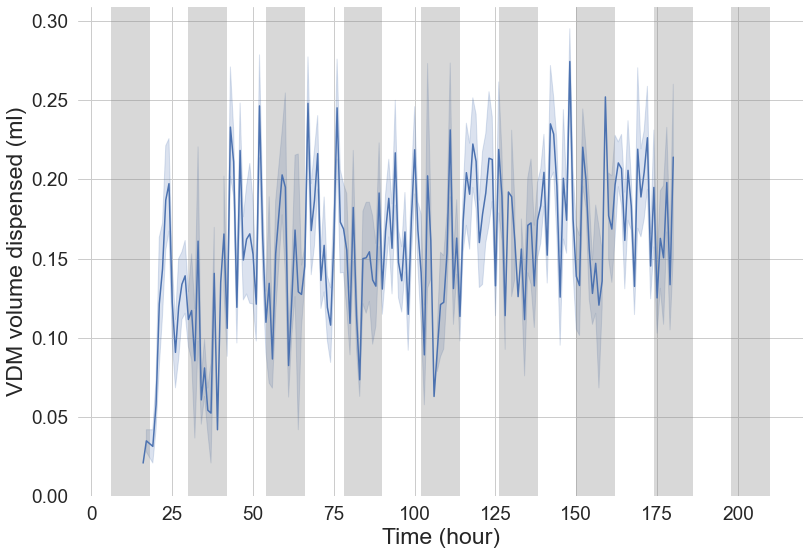

In [8]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(13,9))

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 


sns.lineplot(x='hour_count_running', y='value', data=data_gb, 
            ci=68, markers=True, dashes=False)

#plt.xticks(rotation=90)
sns.despine(bottom=True, left=True)
plt.ylim(0,)
plt.xlabel('Time (hour)', fontsize=23)
plt.ylabel('VDM volume dispensed (ml)', fontsize=23)

x1 = 6
x2 = 18
plt.axvspan(x1, x2, color='gray', alpha=0.3, lw=0)

x1 = 6 + (24*1)
x2 = 18 + (24*1)
plt.axvspan(x1, x2, color='gray', alpha=0.3, lw=0)

x1 = 6 + (24*2)
x2 = 18 + (24*2)
plt.axvspan(x1, x2, color='gray', alpha=0.3, lw=0)

x1 = 6 + (24*3)
x2 = 18 + (24*3)
plt.axvspan(x1, x2, color='gray', alpha=0.3, lw=0)

x1 = 6 + (24*4)
x2 = 18 + (24*4)
plt.axvspan(x1, x2, color='gray', alpha=0.3, lw=0)

x1 = 6 + (24*5)
x2 = 18 + (24*5)
plt.axvspan(x1, x2, color='gray', alpha=0.3, lw=0)

x1 = 6 + (24*6)
x2 = 18 + (24*6)
plt.axvspan(x1, x2, color='gray', alpha=0.3, lw=0)

x1 = 6 + (24*7)
x2 = 18 + (24*7)
plt.axvspan(x1, x2, color='gray', alpha=0.3, lw=0)

x1 = 6 + (24*8)
x2 = 18 + (24*8)
plt.axvspan(x1, x2, color='gray', alpha=0.3, lw=0)

plt.show()

### Viz across 24 hours

In [10]:
#total intake per hour per day
data_gb = data.groupby(['Sex', 'SIP_Cage', 'IdRFID', 'day_count', 'VDM_hour',
                                  ])[['value']].sum().reset_index()

data_gb.head()

,Sex,SIP_Cage,IdRFID,day_count,VDM_hour,value
0,female,3,041ABFE8D4,1,22,0.368
1,female,3,041ABFE8D4,1,23,0.366
2,female,3,041ABFE8D4,2,0,0.376
3,female,3,041ABFE8D4,2,1,0.378
4,female,3,041ABFE8D4,2,2,0.027


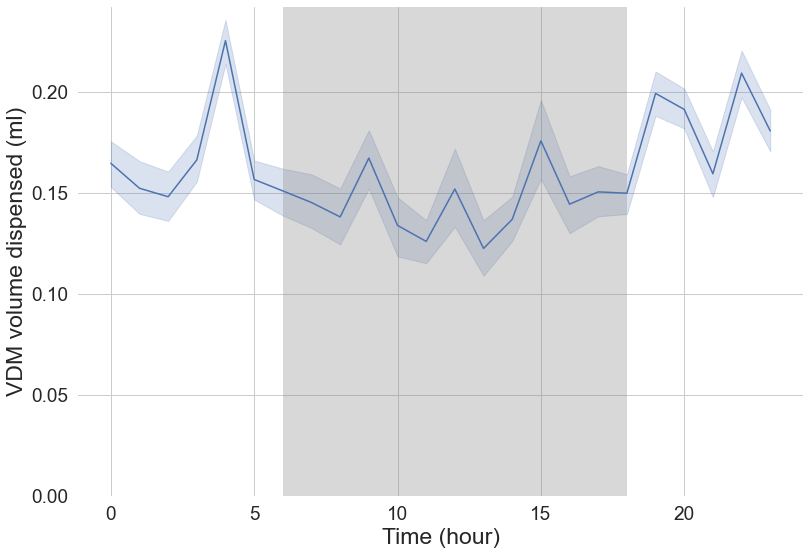

In [11]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(13,9))

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 


sns.lineplot(x='VDM_hour', y='value', data=data_gb, 
            ci=68, markers=True, dashes=False)

#plt.xticks(rotation=90)
sns.despine(bottom=True, left=True)
plt.ylim(0,)
plt.xlabel('Time (hour)', fontsize=23)
plt.ylabel('VDM volume dispensed (ml)', fontsize=23)

x1 = 6
x2 = 18
plt.axvspan(x1, x2, color='gray', alpha=0.3, lw=0)

plt.show()

### Viz across light/dark cycle

In [16]:
#total intake per hour per day
data_gb = data.groupby(['Sex', 'SIP_Cage', 'IdRFID', 'day_count', 'ld_cycle',
                                  ])[['value']].sum().reset_index()

data_gb.head()

,Sex,SIP_Cage,IdRFID,day_count,ld_cycle,value
0,female,3,041ABFE8D4,1,dark,0.734
1,female,3,041ABFE8D4,2,dark,2.822
2,female,3,041ABFE8D4,2,light,0.754
3,female,3,041ABFE8D4,3,dark,2.268
4,female,3,041ABFE8D4,3,light,0.642


<Figure size 936x648 with 0 Axes>

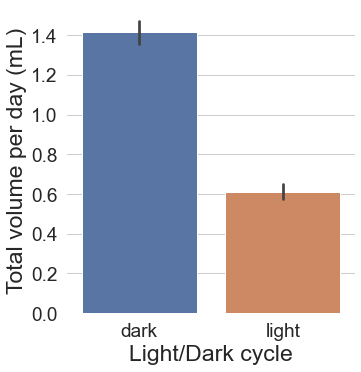

In [19]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(13,9))

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 


sns.catplot(x='ld_cycle', y='value', data=data_gb,  kind='bar', 
            ci=68, height=5, aspect=1, )

#plt.xticks(rotation=90)
sns.despine(bottom=True, left=True)
plt.ylim(0,)
plt.xlabel('Light/Dark cycle', fontsize=23)
plt.ylabel('Total volume per day (mL)', fontsize=23)


plt.show()

#### ttest of light vs dark cycle intake 

In [23]:
stats.ttest_ind(data_gb[data_gb['ld_cycle']=='dark']['value'], data_gb[data_gb['ld_cycle']=='light']['value'])

Ttest_indResult(statistic=10.987961337377728, pvalue=1.850679100289292e-23)

### correlation between VDM and RFID

In [24]:
data_gb = data.groupby(['Sex', 'SIP_Cage', 'IdRFID', 'day_count', 'ld_cycle',
                                  ])[['value', 'RFID_eventDuration',]].sum().reset_index()

data_gb.head()

,Sex,SIP_Cage,IdRFID,day_count,ld_cycle,value,RFID_eventDuration
0,female,3,041ABFE8D4,1,dark,0.734,380.439
1,female,3,041ABFE8D4,2,dark,2.822,1699.662
2,female,3,041ABFE8D4,2,light,0.754,901.290
3,female,3,041ABFE8D4,3,dark,2.268,1598.095
4,female,3,041ABFE8D4,3,light,0.642,657.308


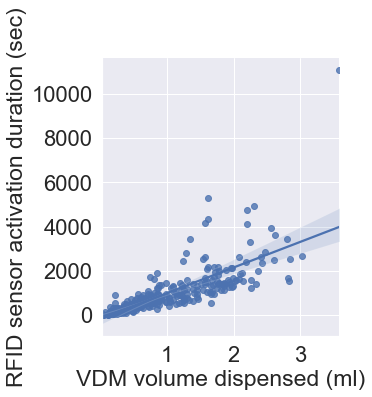

In [26]:
sns.lmplot(x='value', y='RFID_eventDuration', data=data_gb)
plt.xlabel('VDM volume dispensed (ml)', fontsize=23)
plt.ylabel('RFID sensor activation duration (sec)', fontsize=23)
plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 

#### regression 

In [27]:
stats.pearsonr(data_gb['RFID_eventDuration'], data_gb['value'])

(0.7520190779642209, 8.562837901058266e-51)

### Summary graph

In [321]:
data_gb = data.groupby(['Sex', 'SIP_Cage', 'IdRFID', 'day_count', 'ld_cycle',
                                  ])[['value', 'RFID_eventDuration',]].sum().reset_index()


VDM_data['value_wt'] = VDM_data['value']*1000 / VDM_data['weight_pre']

VDM_data.head()

,Unnamed: 0,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,weight_pre,weight_post,weight_diff,notes,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,VDM_drink,Cage_VDM_update,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,VDM_RFID_timediff,VDM_RFID_timediff_bool,day_count,min_count,sec_count,hour_count_running,min_count_running,sec_count_running,substance,ld_seg,value_wt
3715,3715,flavor,four_four,21.11.11,na,3,041AC0399F,NaN,457.0,na,female,3,26.6,NaN,NaN,NaN,28,br.c.g.o_fm_211111.csv,3,11/11/21 16:27:24,drink_1,0.022,2021-11-11 16:27:24,1.636648e+09,2021-11-11,11,16:27:24,16,27,24,VDM_blueras,NaN,14.642,041AC0399F,blue_ras,2021-11-11 16:27:19.809993600,2021-11-11 16:27:34.451993600,light,light_day1,0.0,same,1,987,59244,16,987,59184,blueras,light,0.827068
3716,3716,flavor,four_four,21.11.11,na,3,041AC0399F,NaN,457.0,na,female,3,26.6,NaN,NaN,NaN,65,br.c.g.o_fm_211111.csv,3,11/11/21 19:15:50,drink_1,0.022,2021-11-11 19:15:50,1.636658e+09,2021-11-11,11,19:15:50,19,15,50,VDM_blueras,NaN,63.975,041AC0399F,blue_ras,2021-11-11 19:15:48.771043200,2021-11-11 19:16:52.746043200,dark,dark_night1,0.0,same,1,1155,69350,19,1155,69290,blueras,dark_pm,0.827068
3717,3717,flavor,four_four,21.11.11,na,3,041AC0399F,NaN,457.0,na,female,3,26.6,NaN,NaN,NaN,168,br.c.g.o_fm_211111.csv,3,11/11/21 22:35:28,drink_1,0.022,2021-11-11 22:35:28,1.636670e+09,2021-11-11,11,22:35:28,22,35,28,VDM_blueras,NaN,7.191,041AC0399F,blue_ras,2021-11-11 22:35:21.662016000,2021-11-11 22:35:28.853016000,dark,dark_night1,0.0,same,1,1355,81328,22,1355,81268,blueras,dark_pm,0.827068
3718,3718,flavor,four_four,21.11.11,na,3,041AC0399F,NaN,457.0,na,female,3,26.6,NaN,NaN,NaN,211,br.c.g.o_fm_211111.csv,3,11/12/21 00:49:34,drink_1,0.022,2021-11-12 00:49:34,1.636678e+09,2021-11-12,12,00:49:34,0,49,34,VDM_blueras,NaN,19.106,041AC0399F,blue_ras,2021-11-12 00:49:28.263014400,2021-11-12 00:49:47.369014400,dark,dark_night1,0.0,same,2,49,2974,24,1489,89314,blueras,dark_am,0.827068
3719,3719,flavor,four_four,21.11.11,na,3,041AC0399F,NaN,457.0,na,female,3,26.6,NaN,NaN,NaN,212,br.c.g.o_fm_211111.csv,3,11/12/21 00:49:38,drink_1,0.022,2021-11-12 00:49:38,1.636678e+09,2021-11-12,12,00:49:38,0,49,38,VDM_blueras,NaN,19.106,041AC0399F,blue_ras,2021-11-12 00:49:28.263014400,2021-11-12 00:49:47.369014400,dark,dark_night1,0.0,same,2,49,2978,24,1489,89318,blueras,dark_am,0.827068


In [32]:
#intake data normalized to body weight
data['value_wt'] = data['value']*1000 / data['weight_pre']

data_gb = data.groupby(['Sex', 'SIP_Cage', 'IdRFID', 'day_count', 'Substance'])[['value', 'value_wt', 'RFID_eventDuration',]].sum().reset_index()

data_gb.head()

,Sex,SIP_Cage,IdRFID,day_count,Substance,value,value_wt,RFID_eventDuration
0,female,3,041ABFE8D4,1,blueras,0.275,13.095238,168.762
1,female,3,041ABFE8D4,1,grape,0.459,21.857143,211.677
2,female,3,041ABFE8D4,2,blueras,0.125,5.952381,43.317
3,female,3,041ABFE8D4,2,cherry,0.022,1.047619,12.551
4,female,3,041ABFE8D4,2,grape,3.429,163.285714,2545.084


<Figure size 936x648 with 0 Axes>

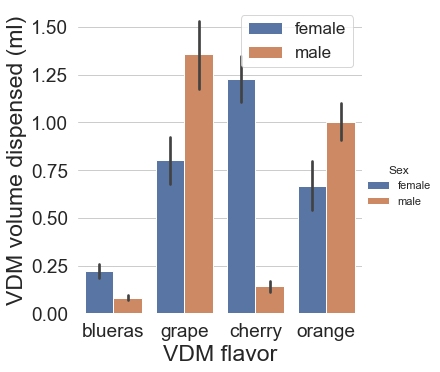

In [35]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(13,9))

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 


sns.catplot(x='Substance', y='value', data=data_gb,  kind='bar', 
            ci=68, height=5, aspect=1, hue='Sex')

#plt.xticks(rotation=90)
sns.despine(bottom=True, left=True)
plt.ylim(0,)
plt.xlabel('VDM flavor', fontsize=23)
plt.ylabel('VDM volume dispensed (ml)', fontsize=23)
plt.legend(fontsize=17)

plt.show()

### Individual differences viz

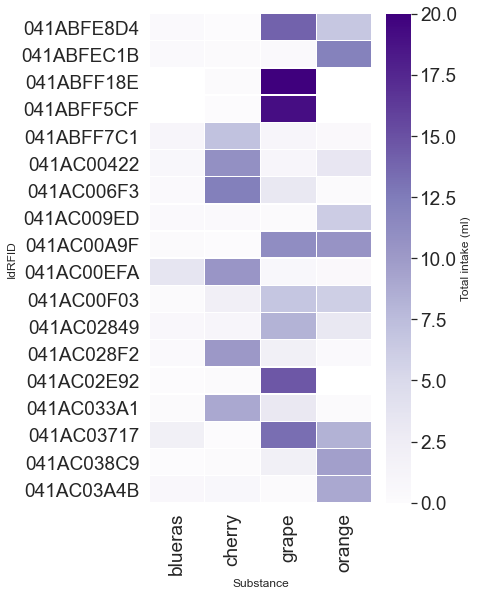

In [41]:
data_gb = data.groupby(['Sex', 'IdRFID', 'Substance'])[['value', 'value_wt', 'RFID_eventDuration',]].sum().reset_index()

data_gb = data_gb.pivot('IdRFID', 'Substance', "value")
plt.figure(figsize=(5,9))
ax = sns.heatmap(data_gb, cmap="Purples", vmin=0, vmax=20, linewidths=.5,
                     cbar_kws={'label': 'Total intake (ml)'})

### Raster plot

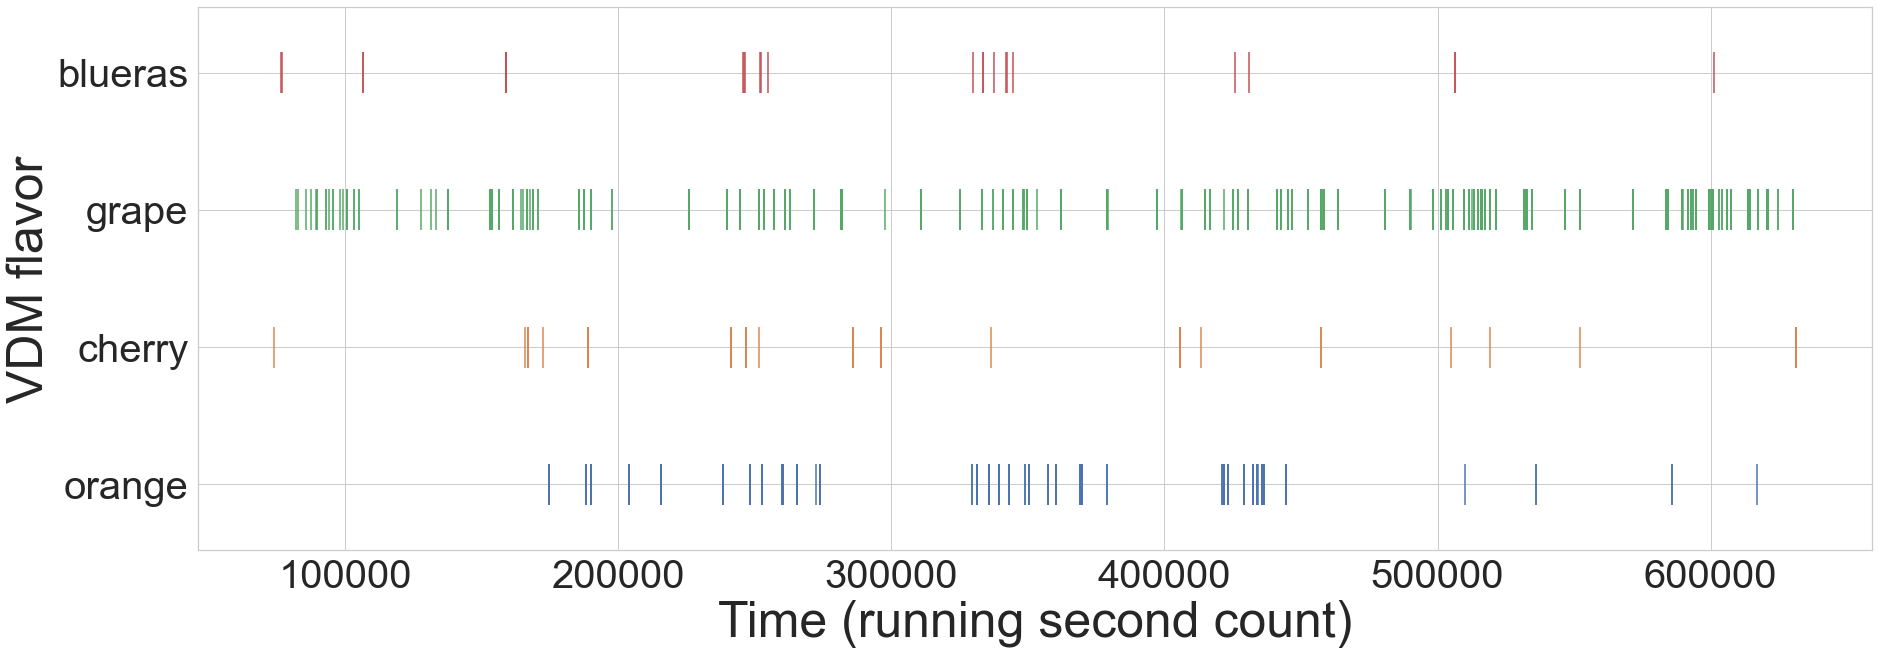

In [42]:
data_idivid = data[data['IdRFID']=='041AC00422']

colorCodes = ['C{}'.format(i) for i in range(4)]

data_1 = data_idivid[data_idivid['Substance'] == 'orange']['sec_count_running'].values
data_2 = data_idivid[data_idivid['Substance'] == 'cherry']['sec_count_running'].values
data_4 = data_idivid[data_idivid['Substance'] == 'grape']['sec_count_running'].values
data_5 = data_idivid[data_idivid['Substance'] == 'blueras']['sec_count_running'].values

data_array = np.array([data_1,  data_4, data_2, data_5,  ])

# Draw a spike raster plot
plt.figure(figsize=(30,10))
params = {'axes.labelsize': 75,
          'axes.titlesize': 75}
plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=40) 
plt.rcParams.update(params)
plt.yticks([0,1,2,3], 
           ['orange', 'cherry', 'grape', 'blueras', ])
plt.eventplot(data_array, color=colorCodes, linelengths = 0.3) 
plt.xlabel('Time (running second count)', fontsize=50)
plt.ylabel('VDM flavor', fontsize=50)

plt.show()